In [6]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
cifras = pd.read_csv('cifras.csv')

In [7]:
# Ajustamos los criterios para aumentar casos positivos 
cifras['Mercado_Atractivo'] = (
    (cifras['Demanda_Ajustada'] > cifras['Demanda_Ajustada'].quantile(0.65)) &  
    ((cifras['AHS MaxRate (%)'] < 40) | (cifras['TLC_Con_GT'] == 1)) &  
    (cifras['Country Growth (%)'] > 2.5)  # Bajamos umbral crecimiento
).astype(int)

# Verificamos nueva distribución
print("Nueva distribución del target:\n", cifras['Mercado_Atractivo'].value_counts(normalize=True))

Nueva distribución del target:
 Mercado_Atractivo
0    0.970067
1    0.029933
Name: proportion, dtype: float64


=== MODELO BASELINE ===


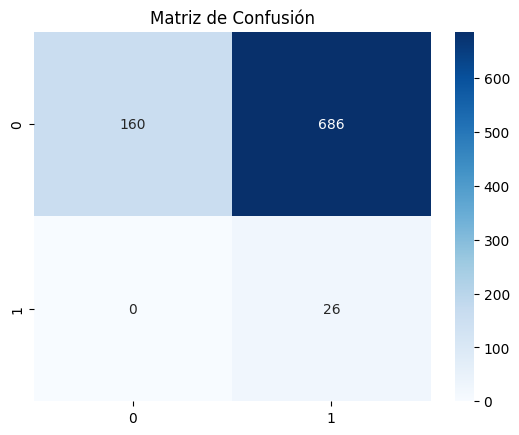

              precision    recall  f1-score   support

           0       1.00      0.19      0.32       846
           1       0.04      1.00      0.07        26

    accuracy                           0.21       872
   macro avg       0.52      0.59      0.19       872
weighted avg       0.97      0.21      0.31       872

AUC-ROC: 0.812
KS: 0.576


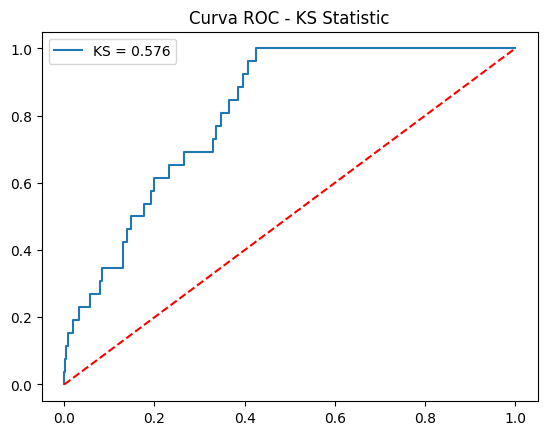

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import scipy.stats as stats
from sklearn.metrics import roc_auc_score

# Modelo Baseline (Regresión Logística)
model_baseline = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    solver='liblinear'
)
model_baseline.fit(X_res, y_res)

#  Métricas Avanzadas
def evaluar_modelo_avanzado(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusión')
    plt.show()
    
    # Métricas clave
    print(classification_report(y_test, y_pred))
    print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.3f}")
    
    # Cálculo de KS
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    ks = max(tpr - fpr)
    print(f"KS: {ks:.3f}")
    
    # Gráfico KS
    plt.plot(fpr, tpr, label=f'KS = {ks:.3f}')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('Curva ROC - KS Statistic')
    plt.legend()
    plt.show()

# Evaluación
print("=== MODELO BASELINE ===")
evaluar_modelo_avanzado(model_baseline, X_test, y_test)


Correlación con Mercado_Atractivo (ordenada):
TLC_Con_GT                                 0.541455
Share_Banano                               0.208525
Share_Hortalizas                           0.206303
Share_Carne                                0.194737
Share_Azucar                               0.186631
Export (US$ Thousand)                      0.175578
Share_Lacteos                              0.154337
MFN SpecificDuty Imports (log)             0.150770
MFN Dutiable Imports (US$ Thousand)        0.136329
Revealed Comparative Advantage             0.134980
AHS Dutiable Imports (US$ Thousand)        0.134613
MFN SpecificDuty Imports (US$ Thousand)    0.125414
Share_Total_Ponderado                      0.114604
AHS SpecificDuty Imports (US$ Thousand)    0.113754
Import (US$ Thousand)                      0.111384
AHS Duty Free Imports (US$ Thousand)       0.110913
Share_Textiles                             0.104936
MFN Total Tariff Lines                     0.104363
Country Growth (%

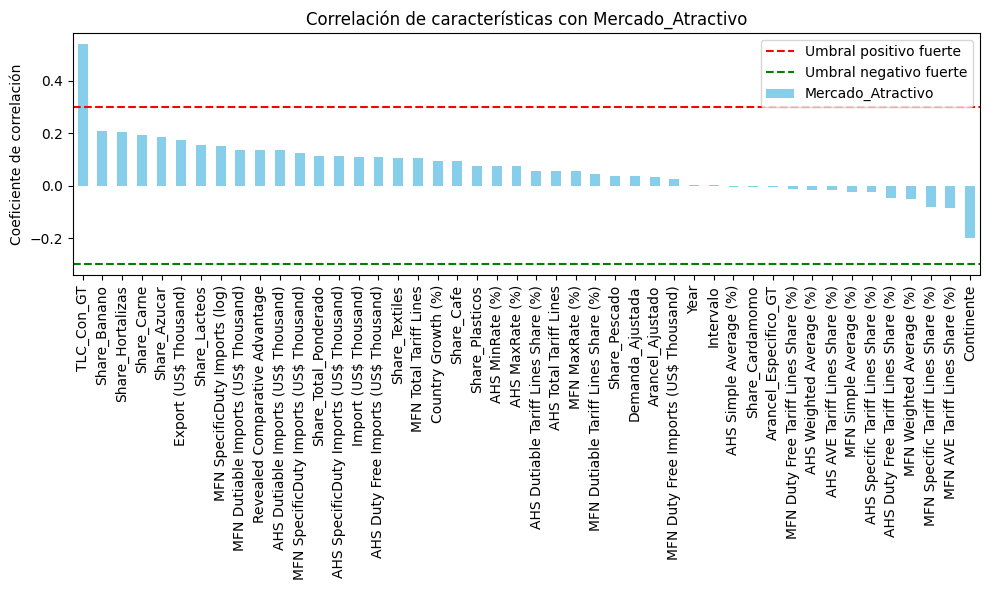


Pares de variables con correlación > 0.8:
Year - Intervalo: 0.996
Export (US$ Thousand) - Import (US$ Thousand): 0.915
Export (US$ Thousand) - AHS Dutiable Imports (US$ Thousand): 0.858
Export (US$ Thousand) - MFN Dutiable Imports (US$ Thousand): 0.858
Export (US$ Thousand) - Share_Cafe: 0.846
Export (US$ Thousand) - Share_Banano: 0.963
Export (US$ Thousand) - Share_Azucar: 0.958
Export (US$ Thousand) - Share_Textiles: 0.876
Export (US$ Thousand) - Share_Hortalizas: 0.973
Export (US$ Thousand) - Share_Lacteos: 0.901
Export (US$ Thousand) - Share_Carne: 0.972
Export (US$ Thousand) - Share_Plasticos: 0.851
Export (US$ Thousand) - Share_Total_Ponderado: 0.917
Import (US$ Thousand) - AHS Dutiable Imports (US$ Thousand): 0.934
Import (US$ Thousand) - MFN Dutiable Imports (US$ Thousand): 0.934
Import (US$ Thousand) - Share_Cafe: 0.88
Import (US$ Thousand) - Share_Banano: 0.895
Import (US$ Thousand) - Share_Azucar: 0.958
Import (US$ Thousand) - Share_Textiles: 0.983
Import (US$ Thousand) - S

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Eliminar columna Partner Name si existe
if 'Partner Name' in cifras.columns:
    cifras = cifras.drop('Partner Name', axis=1)

# Codificar variables categóricas (como Continente)
label_encoder = LabelEncoder()
categorical_cols = cifras.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    if col != 'Mercado_Atractivo':  # No codificar la variable objetivo
        cifras[col] = label_encoder.fit_transform(cifras[col])

if cifras['Mercado_Atractivo'].dtype == 'object':
    cifras['Mercado_Atractivo'] = label_encoder.fit_transform(cifras['Mercado_Atractivo'])

# Matriz de correlación
corr_matrix = cifras.corr()

# Heatmap de correlación


#  Correlación con la variable objetivo (ordenada)
target_corr = corr_matrix['Mercado_Atractivo'].sort_values(ascending=False)

# Eliminar la autocorrelación consigo misma
target_corr = target_corr.drop('Mercado_Atractivo', errors='ignore')

print("\nCorrelación con Mercado_Atractivo (ordenada):")
print(target_corr)

plt.figure(figsize=(10, 6))
target_corr.plot(kind='bar', color='skyblue')
plt.title('Correlación de características con Mercado_Atractivo')
plt.ylabel('Coeficiente de correlación')
plt.axhline(y=0.3, color='r', linestyle='--', label='Umbral positivo fuerte')
plt.axhline(y=-0.3, color='g', linestyle='--', label='Umbral negativo fuerte')
plt.legend()
plt.tight_layout()
plt.show()

#  Identificación de variables altamente correlacionadas entre sí
# (Para detectar posible multicolinealidad)

# Crear matriz de correlación sin la variable objetivo
features_corr = cifras.drop('Mercado_Atractivo', axis=1, errors='ignore').corr()

# Encontrar pares de variables con alta correlación
high_corr = np.where((features_corr > 0.8) & (features_corr < 1.0))

high_corr_pairs = [(features_corr.columns[x], features_corr.columns[y], 
                   round(features_corr.iloc[x, y], 3))
                  for x, y in zip(*high_corr) if x < y]

print("\nPares de variables con correlación > 0.8:")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]}")

C:\Users\andre\AppData\Local\Temp\ipykernel_15428\2861007854.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature',


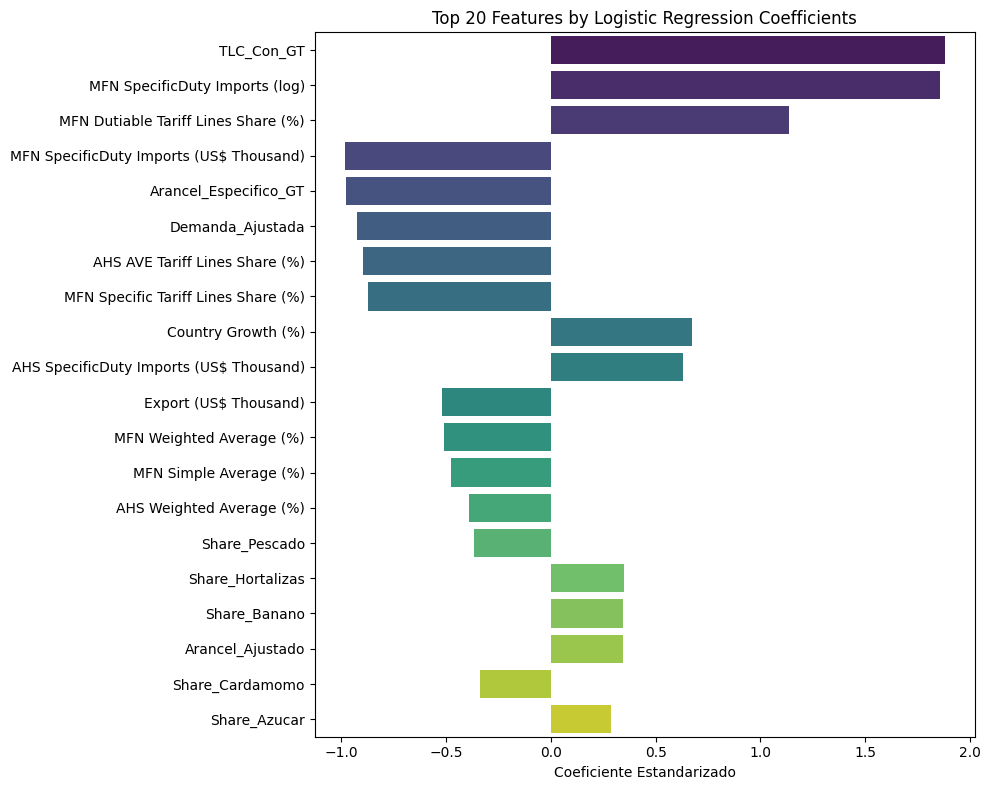

Feature


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.inspection import permutation_importance
import statsmodels.api as sm
import seaborn as sns


# Eliminar columnas no relevantes
cifras = cifras.drop(['Partner Name'], axis=1, errors='ignore')


label_encoder = LabelEncoder()
categorical_cols = cifras.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    if col != 'Mercado_Atractivo':
        cifras[col] = label_encoder.fit_transform(cifras[col].astype(str))

# Codificar variable objetivo si es categórica
if cifras['Mercado_Atractivo'].dtype == 'object':
    cifras['Mercado_Atractivo'] = label_encoder.fit_transform(cifras['Mercado_Atractivo'])

# 2. Estandarizar variables (importante para regresión logística)
scaler = StandardScaler()
X = cifras.drop('Mercado_Atractivo', axis=1)
y = cifras['Mercado_Atractivo']

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#  Coeficientes de Regresión Logística
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Obtener coeficientes estandarizados
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0],
    'Abs_Coefficient': np.abs(logreg.coef_[0])
})

# Ordenar por importancia absoluta
coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)

# Visualización top 20 características
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', 
            data=coefficients.head(20), palette='viridis')
plt.title('Top 20 Features by Logistic Regression Coefficients')
plt.xlabel('Coeficiente Estandarizado')
plt.ylabel('')
plt.tight_layout()
plt.show()

print('Feature')

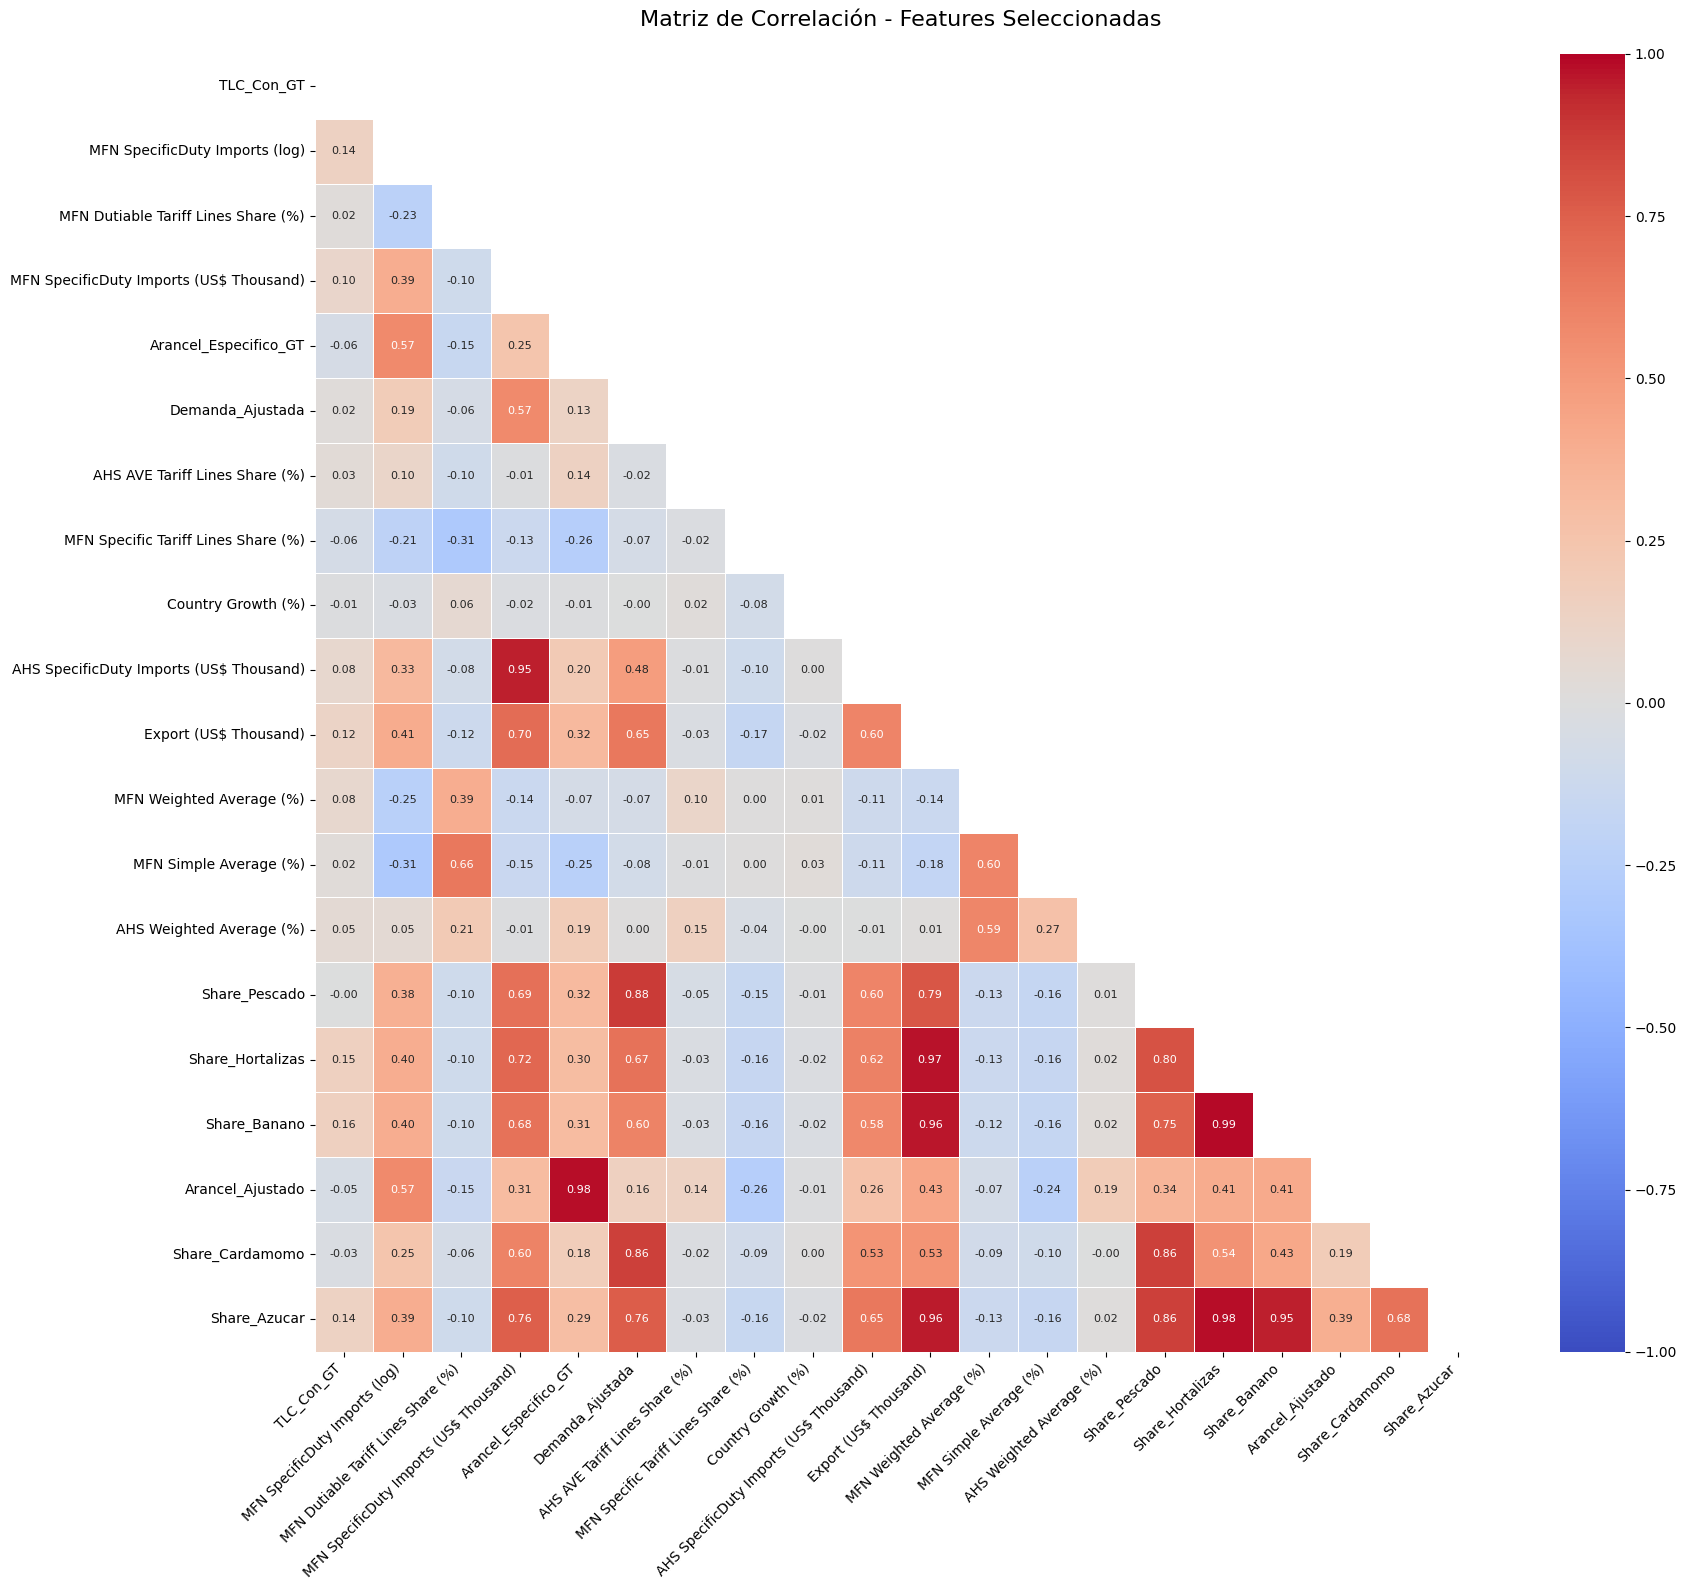


Pares de variables con correlación > |0.7|:
MFN SpecificDuty Imports (US$ Thousand) - AHS SpecificDuty Imports (US$ Thousand): 0.946
MFN SpecificDuty Imports (US$ Thousand) - Share_Hortalizas: 0.719
MFN SpecificDuty Imports (US$ Thousand) - Share_Azucar: 0.756
Arancel_Especifico_GT - Arancel_Ajustado: 0.98
Demanda_Ajustada - Share_Pescado: 0.881
Demanda_Ajustada - Share_Cardamomo: 0.863
Demanda_Ajustada - Share_Azucar: 0.762
Export (US$ Thousand) - Share_Pescado: 0.788
Export (US$ Thousand) - Share_Hortalizas: 0.973
Export (US$ Thousand) - Share_Banano: 0.963
Export (US$ Thousand) - Share_Azucar: 0.958
Share_Pescado - Share_Hortalizas: 0.798
Share_Pescado - Share_Banano: 0.749
Share_Pescado - Share_Cardamomo: 0.861
Share_Pescado - Share_Azucar: 0.861
Share_Hortalizas - Share_Banano: 0.99
Share_Hortalizas - Share_Azucar: 0.983
Share_Banano - Share_Azucar: 0.948


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

selected_features = [
    'TLC_Con_GT',
    'MFN SpecificDuty Imports (log)',
    'MFN Dutiable Tariff Lines Share (%)',
    'MFN SpecificDuty Imports (US$ Thousand)',
    'Arancel_Especifico_GT',
    'Demanda_Ajustada',
    'AHS AVE Tariff Lines Share (%)',
    'MFN Specific Tariff Lines Share (%)',
    'Country Growth (%)',
    'AHS SpecificDuty Imports (US$ Thousand)',
    'Export (US$ Thousand)',
    'MFN Weighted Average (%)',
    'MFN Simple Average (%)',
    'AHS Weighted Average (%)',
    'Share_Pescado',
    'Share_Hortalizas',
    'Share_Banano',
    'Arancel_Ajustado',
    'Share_Cardamomo',
    'Share_Azucar'
]


df_selected = cifras[selected_features]

corr_matrix = df_selected.corr()


plt.figure(figsize=(18, 16))

# Crear máscara para mostrar solo la mitad inferior del heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Crear heatmap con seaborn
sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            center=0,
            vmin=-1, 
            vmax=1,
            annot_kws={"size": 8},
            linewidths=0.5)

# Ajustar el gráfico
plt.title('Matriz de Correlación - Features Seleccionadas', pad=20, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

plt.show()

# Identificar correlaciones altas (positivas o negativas)
high_corr = np.where((corr_matrix > 0.7) | (corr_matrix < -0.7))

# Filtrar para evitar duplicados y autocorrelación
high_corr_pairs = [(corr_matrix.columns[x], corr_matrix.columns[y], 
                   round(corr_matrix.iloc[x, y], 3))
                  for x, y in zip(*high_corr) if x < y]

print("\nPares de variables con correlación > |0.7|:")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Preparar variable objetivo binaria
if cifras['Mercado_Atractivo'].dtype == 'object':
    cifras['Mercado_Atractivo'] = LabelEncoder().fit_transform(cifras['Mercado_Atractivo'])

# Función optimizada para calcular WoE e IV
def calculate_woe_iv_simple(cifras, variable, target):
    temp_df = cifras[[variable, target]].copy()
    total_bad = cifras[target].sum()
    total_good = len(cifras) - total_bad
    
    if pd.api.types.is_numeric_dtype(temp_df[variable]):
        try:
            temp_df['bin'] = pd.qcut(temp_df[variable], q=5, duplicates='drop')
        except:
            temp_df['bin'] = pd.cut(temp_df[variable], bins=5)
    else:
        temp_df['bin'] = temp_df[variable]
    
    grouped = temp_df.groupby('bin', observed=True).agg(
        total=('bin', 'count'),
        bads=(target, 'sum')
    ).assign(
        goods=lambda x: x['total'] - x['bads'],
        pct_good=lambda x: x['goods'] / total_good,
        pct_bad=lambda x: x['bads'] / total_bad,
        woe=lambda x: np.log(x['pct_good'] / x['pct_bad']),
        iv=lambda x: (x['pct_good'] - x['pct_bad']) * x['woe']
    ).replace([np.inf, -np.inf], np.nan).fillna(0)
    
    return grouped, grouped['iv'].sum()

#  Lista de variables a analizar
variables = [
    'TLC_Con_GT', 'MFN SpecificDuty Imports (log)', 
    'MFN Duitable Tariff Lines Share (%)', 
    'MFN SpecificDuty Imports (US$ Thousand)',
    'Arancel_Especifico_GT', 'Demanda_Ajustada',
    'AHS AVE Tariff Lines Share (%)',
    'MFN Specific Tariff Lines Share (%)',
    'Country Growth (%)',
    'AHS SpecificDuty Imports (US$ Thousand)',
    'Export (US$ Thousand)',
    'MFN Weighted Average (%)',
    'MFN Simple Average (%)',
    'AHS Weighted Average (%)',
    'Share_Pescado', 'Share_Hortalizas',
    'Share_Banano', 'Arancel_Ajustado',
    'Share_Cardamomo', 'Share_Azucar'
]

# Cálculo y presentación de resultados
results = []
for var in variables:
    try:
        woe_table, iv = calculate_woe_iv_simple(df, var, 'Mercado_Atractivo')
        results.append({
            'Variable': var,
            'IV': iv,
            'WoE_Range': f"{woe_table['woe'].min():.3f} a {woe_table['woe'].max():.3f}",
            'Bins': len(woe_table)
        })
    except Exception as e:
        results.append({
            'Variable': var,
            'IV': np.nan,
            'WoE_Range': 'Error',
            'Bins': 0
        })

#  Crear y mostrar DataFrame con resultados
iv_results = pd.DataFrame(results)
iv_results['Fuerza_Predictiva'] = pd.cut(
    iv_results['IV'],
    bins=[-1, 0.02, 0.1, 0.3, 2],
    labels=['No útil', 'Débil', 'Medio', 'Fuerte']
)

#  resultados ordenados por IV
print(iv_results.sort_values('IV', ascending=False).to_string())

                                   Variable        IV       WoE_Range  Bins Fuerza_Predictiva
16                             Share_Banano  1.733696  -1.658 a 2.297     5            Fuerte
15                         Share_Hortalizas  1.445086  -1.623 a 1.378     5            Fuerte
17                         Arancel_Ajustado  1.364031  -4.220 a 2.307     5            Fuerte
19                             Share_Azucar  1.268781  -1.587 a 0.906     5            Fuerte
1            MFN SpecificDuty Imports (log)  1.265670  -1.419 a 2.298     5            Fuerte
3   MFN SpecificDuty Imports (US$ Thousand)  1.265670  -1.419 a 2.298     5            Fuerte
10                    Export (US$ Thousand)  1.172295  -1.137 a 2.992     5            Fuerte
7       MFN Specific Tariff Lines Share (%)  1.154098  -1.082 a 2.298     5            Fuerte
5                          Demanda_Ajustada  0.970589  -1.487 a 0.206     5            Fuerte
9   AHS SpecificDuty Imports (US$ Thousand)  0.942986  -1.34

## Iteración 1 : Ensemble con Pesos + Feature Importance

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score

# Balanceo de clases con class_weight
class_weights = {0: 1, 1: 10}  

# Modelo Random Forest con pesos
rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=5, 
    class_weight=class_weights,
    random_state=42
)

#  Selección de features basada en importancia
selector = SelectFromModel(rf, threshold='median')
selector.fit(X_train, y_train)
X_train_sel = selector.transform(X_train)
X_test_sel = selector.transform(X_test)

#  Entrenamiento con validación cruzada
cv_scores = cross_val_score(rf, X_train_sel, y_train, 
                          cv=5, scoring='roc_auc')
print(f"AUC Cross-Validation: {np.mean(cv_scores):.3f} ± {np.std(cv_scores):.3f}")

# Entrenamiento final
rf.fit(X_train_sel, y_train)
y_pred_rf = rf.predict_proba(X_test_sel)[:, 1]

#  Métricas
y_pred_class_rf = (y_pred_rf > optimal_threshold).astype(int)
print(classification_report(y_test, y_pred_class_rf))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_rf):.3f}")

# Feature importance
importances = pd.DataFrame({
    'Feature': X.columns[selector.get_support()],
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeatures más importantes:")
print(importances.head(10))




#import joblib
#joblib.dump(rf, 'modelo_final.pkl')

AUC Cross-Validation: 1.000 ± 0.000
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       846
           1       1.00      0.69      0.82        26

    accuracy                           0.99       872
   macro avg       1.00      0.85      0.91       872
weighted avg       0.99      0.99      0.99       872

ROC-AUC: 1.000

Features más importantes:
                                   Feature  Importance
0                               TLC_Con_GT    0.468845
3                         Demanda_Ajustada    0.110999
2                    Arancel_Especifico_GT    0.085785
4                       Country Growth (%)    0.073685
6                             Share_Banano    0.060363
7                         Arancel_Ajustado    0.054644
5                         Share_Hortalizas    0.052797
9                             Share_Azucar    0.048730
8                          Share_Cardamomo    0.024576
1  MFN SpecificDuty Imports (US$ Thousand)   

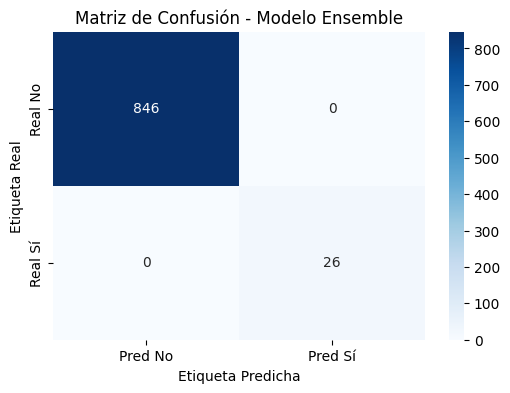

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test_sel)  

# Matriz de confusión básica
cm = confusion_matrix(y_test, y_pred)

# Visualización simple
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred No', 'Pred Sí'],
            yticklabels=['Real No', 'Real Sí'])
plt.title('Matriz de Confusión - Modelo Ensemble')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

AUC Cross-Validation: 1.000 ± 0.000


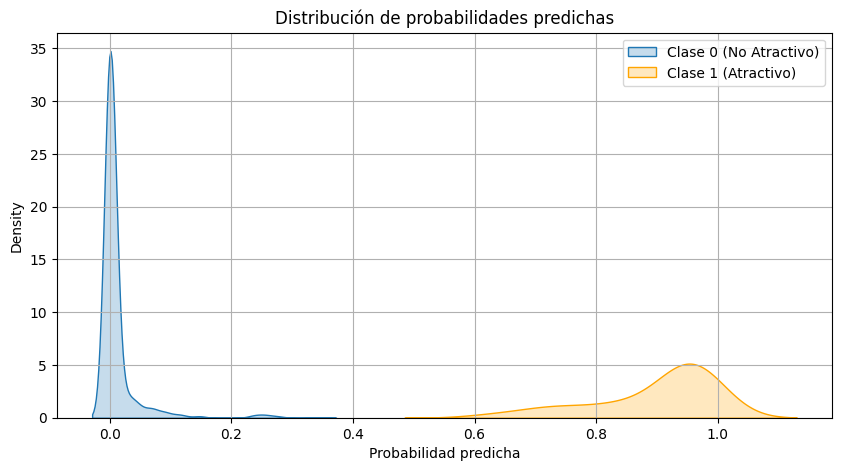

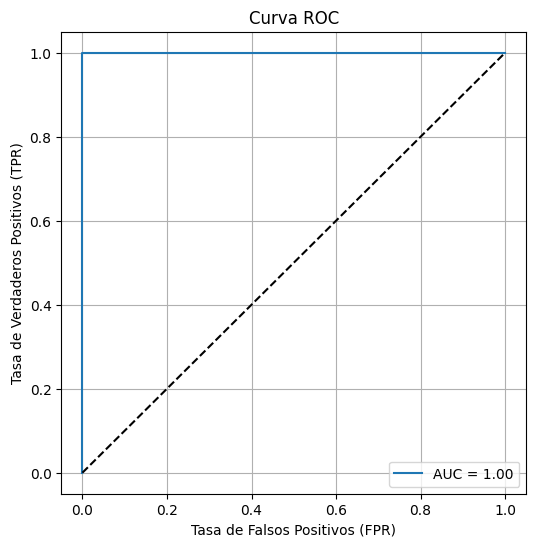

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    classification_report, roc_auc_score, roc_curve,
    precision_recall_curve, confusion_matrix
)

X = cifras[selected_features]
y = cifras['Mercado_Atractivo']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15, random_state=42)

# Ajuste de pesos
class_weights = {0: 1, 1: 10}
rf = RandomForestClassifier(n_estimators=150, max_depth=5, class_weight=class_weights, random_state=42)

# Feature Selection
selector = SelectFromModel(rf, threshold='median')
selector.fit(X_train, y_train)

# Transformación de features
X_train_sel = selector.transform(X_train)
X_test_sel = selector.transform(X_test)

# Validación cruzada
cv_scores = cross_val_score(rf, X_train_sel, y_train, cv=5, scoring='roc_auc')
print(f"AUC Cross-Validation: {np.mean(cv_scores):.3f} ± {np.std(cv_scores):.3f}")

# Entrenamiento y predicción
rf.fit(X_train_sel, y_train)
y_pred_proba = rf.predict_proba(X_test_sel)[:, 1]

# Umbral óptimo basado en precisión * recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
optimal_threshold = thresholds[np.argmax(precision * recall)]
y_pred_class = (y_pred_proba > optimal_threshold).astype(int)


#  Distribución de probabilidades por clase real
plt.figure(figsize=(10, 5))
sns.kdeplot(y_pred_proba[y_test == 0], label="Clase 0 (No Atractivo)", fill=True)
sns.kdeplot(y_pred_proba[y_test == 1], label="Clase 1 (Atractivo)", fill=True, color="orange")
plt.title("Distribución de probabilidades predichas")
plt.xlabel("Probabilidad predicha")
plt.legend()
plt.grid()
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred_proba):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC")
plt.legend()
plt.grid()
plt.show()




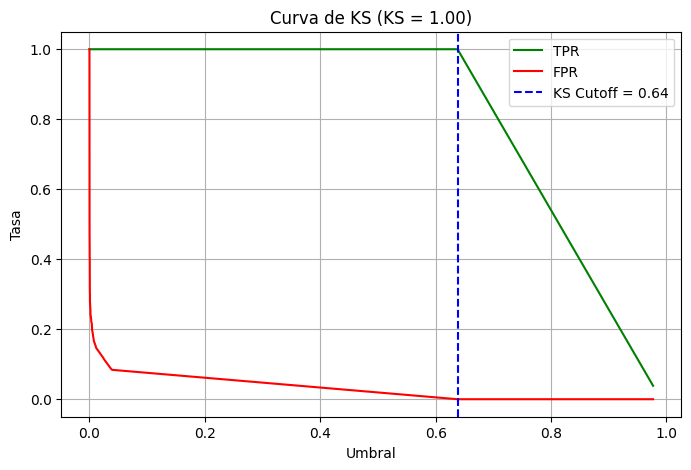

KS Statistic: 1.000 en el umbral 0.64


In [ ]:

fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)


ks_stat = max(tpr - fpr)
ks_threshold_index = np.argmax(tpr - fpr)
ks_cutoff = thresholds_roc[ks_threshold_index]


plt.figure(figsize=(8, 5))
plt.plot(thresholds_roc, tpr, label="TPR", color="green")
plt.plot(thresholds_roc, fpr, label="FPR", color="red")
plt.axvline(ks_cutoff, color='blue', linestyle='--', label=f'KS Cutoff = {ks_cutoff:.2f}')
plt.title(f"Curva de KS (KS = {ks_stat:.2f})")
plt.xlabel("Umbral")
plt.ylabel("Tasa")
plt.legend()
plt.grid()
plt.show()

print(f"KS Statistic: {ks_stat:.3f} en el umbral {ks_cutoff:.2f}")


## Iteración 2 : Regresión Logística + Optimización de Threshold

In [4]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, FunctionTransformer
from imblearn.combine import SMOTETomek
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Features y target
features = selected_features
X = cifras[features]
y = cifras['Mercado_Atractivo']

# Tipos de variables
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

print(f" Variables numéricas: {len(numeric_features)}")
print(f" Variables categóricas: {len(categorical_features)}")



 Variables numéricas: 20
 Variables categóricas: 0


In [5]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Verificación del desbalanceo
print("Distribución original:", y.value_counts(normalize=True))

#  Combinación SMOTE + UnderSampling
resampler = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.30, random_state=42)),  # Crea un 30% de casos positivos
    ('under', RandomUnderSampler(sampling_strategy=0.5, random_state=42))  # Reduce mayoría al 50%
])

X_res, y_res = resampler.fit_resample(X, y)
print("\nDistribución después de balanceo:", y_res.value_counts(normalize=True))

Distribución original: Mercado_Atractivo
0    0.983141
1    0.016859
Name: proportion, dtype: float64

Distribución después de balanceo: Mercado_Atractivo
0    0.666667
1    0.333333
Name: proportion, dtype: float64


In [6]:
from sklearn.linear_model import LogisticRegression
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('resampler', SMOTETomek(sampling_strategy=0.5, random_state=42)),
    ('classifier', LogisticRegression(
        class_weight='balanced',  
        solver='liblinear',  
        max_iter=1000  
    ))
])


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  Index(['TLC_Con_GT', 'MFN SpecificDuty Imports (log)',
       'MFN Dutiable Tariff Lines Share (%)',
       'MFN SpecificDuty Imports (US$ Thousand)', 'Arancel_Especifico_GT',
       'Demanda_Ajustada', 'AHS AVE Tariff Lines Share (%)',
       'MFN Specific Tariff Lines Share (%)', 'Country Growth (...
       'AHS Weighted Average (%)', 'Share_Pescado', 'Share_Hortalizas',
       'Share_Banano', 'Arancel_Ajustado', 'Share_Cardamomo', 'Share_Azucar'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index([], dtype='object'))])),
                ('resampler',
                 SMOTETomek(random_state=42, sampling_strategy=0.5)),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    solver='liblinear'))])

In [8]:

y_proba = pipeline.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
optimal_threshold = thresholds[np.argmax(precision * recall)]
y_pred = (y_proba >= optimal_threshold).astype(int)




Métricas Finales
              precision    recall  f1-score   support

No Atractivo       1.00      0.99      0.99       857
   Atractivo       0.62      1.00      0.77        15

    accuracy                           0.99       872
   macro avg       0.81      0.99      0.88       872
weighted avg       0.99      0.99      0.99       872



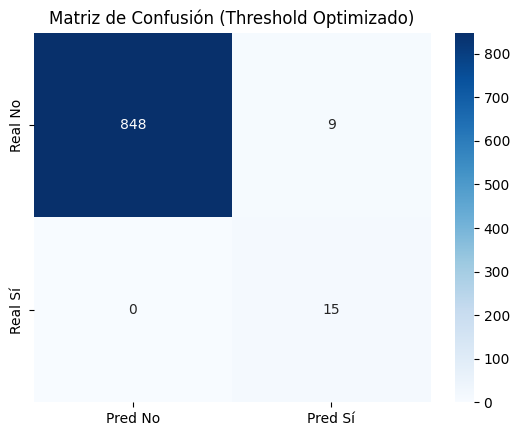

In [9]:

print("\nMétricas Finales")
print(classification_report(y_test, y_pred, target_names=['No Atractivo', 'Atractivo']))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Pred No', 'Pred Sí'],
            yticklabels=['Real No', 'Real Sí'])
plt.title('Matriz de Confusión (Threshold Optimizado)')
plt.show()

Distribución original: Mercado_Atractivo
0    0.983141
1    0.016859
Name: proportion, dtype: float64
Distribución tras rebalanceo de muestra: Mercado_Atractivo
0    0.666667
1    0.333333
Name: proportion, dtype: float64
AUC Cross-Validation: 0.996 ± 0.003


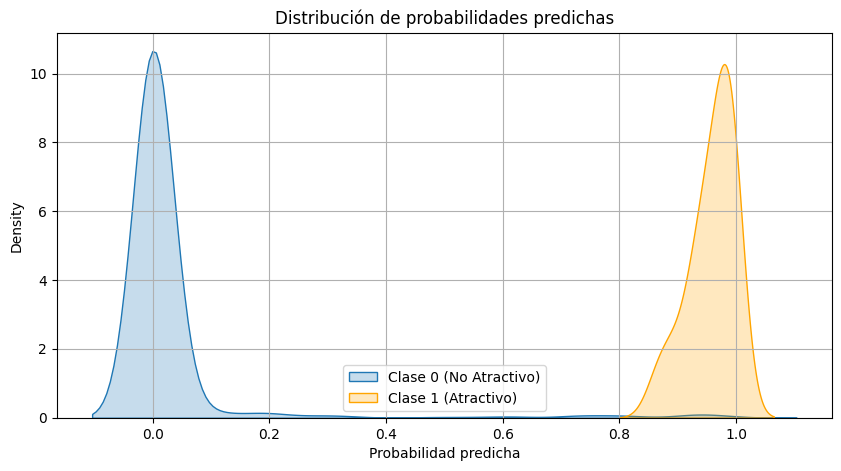

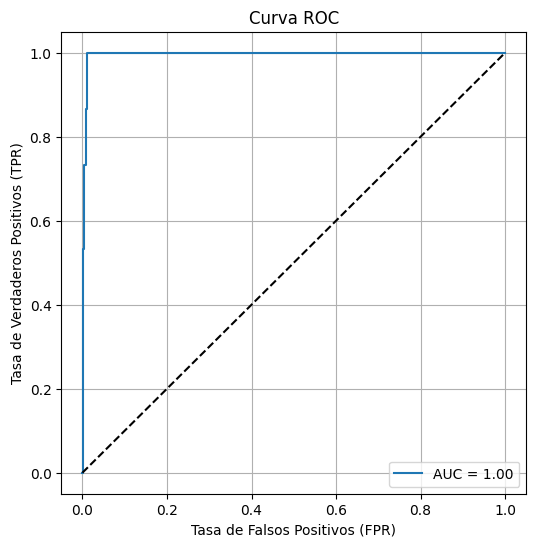

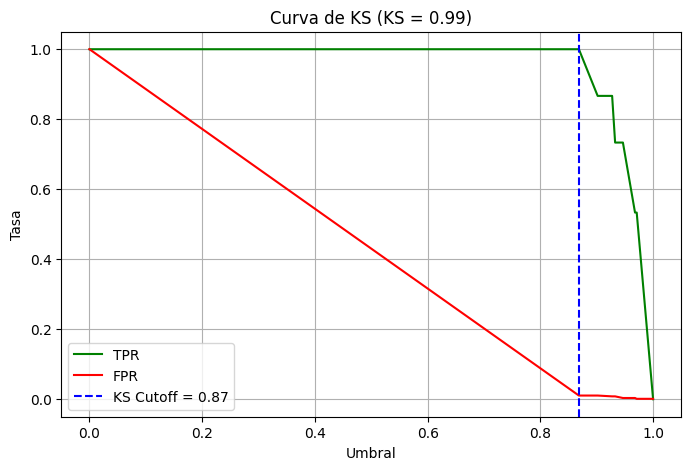

KS Statistic: 0.989 en el umbral 0.87


In [ ]:

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='roc_auc')
print(f"AUC Cross-Validation: {np.mean(auc_scores):.3f} ± {np.std(auc_scores):.3f}")

plt.figure(figsize=(10, 5))
sns.kdeplot(y_proba[y_test == 0], label="Clase 0 (No Atractivo)", fill=True)
sns.kdeplot(y_proba[y_test == 1], label="Clase 1 (Atractivo)", fill=True, color="orange")
plt.title("Distribución de probabilidades predichas")
plt.xlabel("Probabilidad predicha")
plt.legend()
plt.grid()
plt.show()


fpr, tpr, thresholds_roc = roc_curve(y_test, y_proba)
auc_value = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_value:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC")
plt.legend()
plt.grid()
plt.show()

ks_stat = max(tpr - fpr)
ks_index = np.argmax(tpr - fpr)
ks_cutoff = thresholds_roc[ks_index]

plt.figure(figsize=(8, 5))
plt.plot(thresholds_roc, tpr, label="TPR", color='green')
plt.plot(thresholds_roc, fpr, label="FPR", color='red')
plt.axvline(ks_cutoff, color='blue', linestyle='--', label=f'KS Cutoff = {ks_cutoff:.2f}')
plt.title(f"Curva de KS (KS = {ks_stat:.2f})")
plt.xlabel("Umbral")
plt.ylabel("Tasa")
plt.legend()
plt.grid()
plt.show()

print(f"KS Statistic: {ks_stat:.3f} en el umbral {ks_cutoff:.2f}")


## ITERACIÓN 3 Regularización y Balanceo de Clases

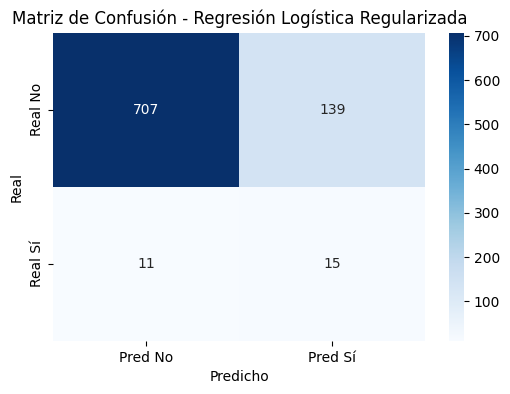


Classification Report:
              precision    recall  f1-score   support

No Atractivo       0.98      0.84      0.90       846
   Atractivo       0.10      0.58      0.17        26

    accuracy                           0.83       872
   macro avg       0.54      0.71      0.54       872
weighted avg       0.96      0.83      0.88       872


ROC-AUC: 0.694
Ratio de Clases (0/1): 32.4:1

Top 10 Features más importantes:
                                Feature          Coef      Abs_Coef
17                     Arancel_Ajustado -9.707274e-05  9.707274e-05
4                 Arancel_Especifico_GT -8.166302e-05  8.166302e-05
5                      Demanda_Ajustada -2.722311e-05  2.722311e-05
7   MFN Specific Tariff Lines Share (%) -4.991411e-06  4.991411e-06
2   MFN Dutiable Tariff Lines Share (%) -2.126562e-06  2.126562e-06
11             MFN Weighted Average (%) -5.199829e-07  5.199829e-07
8                    Country Growth (%)  4.922620e-07  4.922620e-07
12               MFN Simp

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt


ratio_clases = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

## Modelo con regularización fuerte y balanceo
model = LogisticRegression(
    penalty='l2',           # Regularización L2
    C=0.1,                 # Fuerza de regularización (valor más bajo = más regularización)
    class_weight='balanced', # Balance automático de clases
    solver='liblinear',     # Buen solver para regularización L2
    random_state=42,
    max_iter=1000
)

## Entrenamiento
model.fit(X_train, y_train)

## Predicciones (usando threshold de 0.5 para simplificar)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades para clase positiva

## Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred No', 'Pred Sí'],
            yticklabels=['Real No', 'Real Sí'])
plt.title('Matriz de Confusión - Regresión Logística Regularizada')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

## Métricas Clave
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Atractivo', 'Atractivo']))

print(f"\nROC-AUC: {roc_auc_score(y_test, y_proba):.3f}")
print(f"Ratio de Clases (0/1): {ratio_clases:.1f}:1")

## Coeficientes para interpretabilidad
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coef': model.coef_[0],
    'Abs_Coef': np.abs(model.coef_[0])
}).sort_values('Abs_Coef', ascending=False)

print("\nTop 10 Features más importantes:")
print(coef_df.head(10))


KS Statistic: 0.432


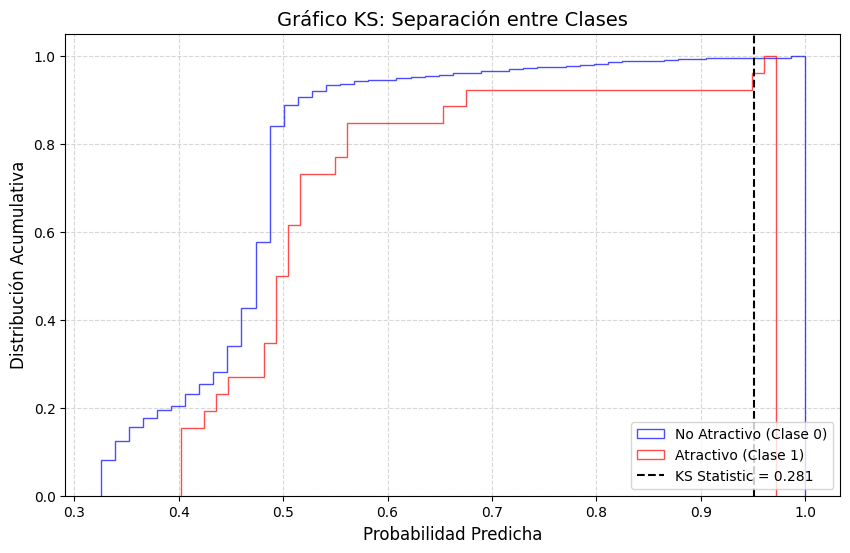

C:\Users\andre\AppData\Local\Temp\ipykernel_15428\1642476306.py:58: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_proba[y_test == 0], label='No Atractivo (Clase 0)', color='blue', shade=True)
C:\Users\andre\AppData\Local\Temp\ipykernel_15428\1642476306.py:59: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_proba[y_test == 1], label='Atractivo (Clase 1)', color='red', shade=True)


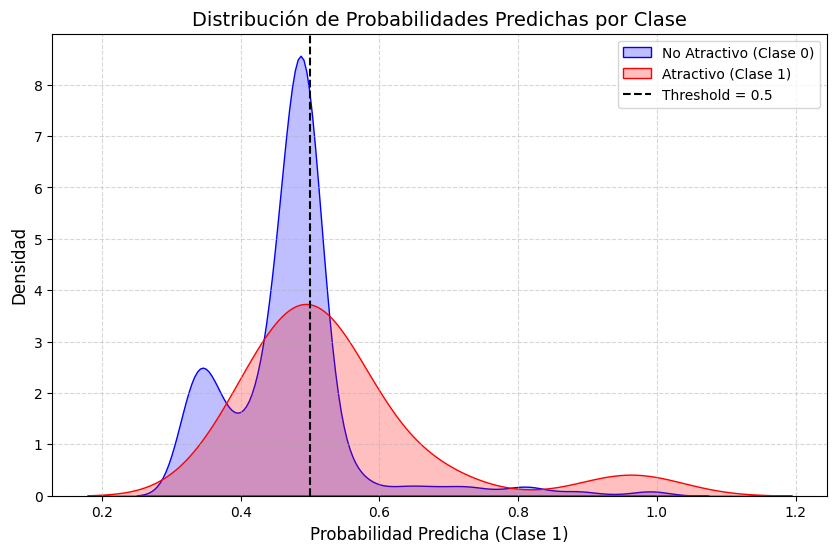

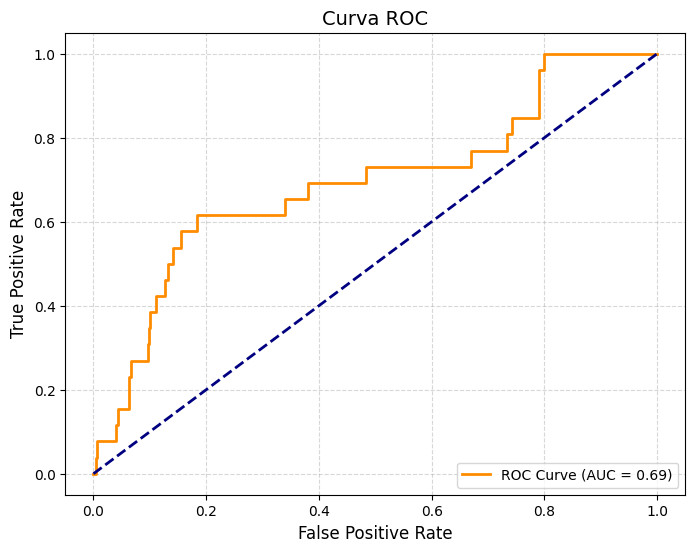

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy.stats import ks_2samp


def calculate_ks(y_true, y_proba):
    
    values = y_proba
    good = values[y_true == 0]
    bad = values[y_true == 1]
    
    # Calcular KS
    ks_statistic, ks_pvalue = ks_2samp(bad, good)
    return ks_statistic

ks_stat = calculate_ks(y_test, y_proba)
print(f"\nKS Statistic: {ks_stat:.3f}")


# --- Gráfico KS Corregido ---
def plot_ks(y_true, y_proba):
    values = y_proba
    good = values[y_true == 0]
    bad = values[y_true == 1]
    
    # Usar percentiles para comparar distribuciones del mismo tamaño
    percentiles = np.linspace(0, 100, 100)
    good_percentiles = np.percentile(good, percentiles)
    bad_percentiles = np.percentile(bad, percentiles)
    
    # Calcular KS en puntos equidistantes
    ks_diff = np.abs(good_percentiles - bad_percentiles)
    max_diff_idx = np.argmax(ks_diff)
    ks_statistic = np.max(ks_diff)
    
    plt.figure(figsize=(10, 6))
    plt.hist(good, bins=50, density=True, cumulative=True, 
             histtype='step', label='No Atractivo (Clase 0)', color='blue', alpha=0.7)
    plt.hist(bad, bins=50, density=True, cumulative=True, 
             histtype='step', label='Atractivo (Clase 1)', color='red', alpha=0.7)
    
    # Línea KS en el punto de máxima divergencia
    plt.axvline(x=bad_percentiles[max_diff_idx], color='black', linestyle='--', 
                label=f'KS Statistic = {ks_statistic:.3f}')
    
    plt.title('Gráfico KS: Separación entre Clases', fontsize=14)
    plt.xlabel('Probabilidad Predicha', fontsize=12)
    plt.ylabel('Distribución Acumulativa', fontsize=12)
    plt.legend(loc='lower right')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

plot_ks(y_test, y_proba)


plt.figure(figsize=(10, 6))
sns.kdeplot(y_proba[y_test == 0], label='No Atractivo (Clase 0)', color='blue', shade=True)
sns.kdeplot(y_proba[y_test == 1], label='Atractivo (Clase 1)', color='red', shade=True)
plt.axvline(x=0.5, color='black', linestyle='--', label='Threshold = 0.5')
plt.title('Distribución de Probabilidades Predichas por Clase', fontsize=14)
plt.xlabel('Probabilidad Predicha (Clase 1)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Curva ROC', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()